# Frame visualization

In [1]:
import os,glob

In [1]:
import os
import shutil
import subprocess
import matplotlib
from matplotlib.pyplot import figure
from datetime import datetime
import time as tm
from PIL import Image
import cv2
import pickle
import random
import face_recognition
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import telegram

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
import plotly
file = open('../W5/plotly_key','r')
plotly_key = (file.read()[:-1])
plotly.tools.set_credentials_file(username='eonr', api_key=plotly_key)
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
keys = open('../telegram_keys','r')
token,chat_id=keys.read().split(',')
def ping_telegram(text):
    import telegram
    bot = telegram.Bot(token=token)
    bot.send_message(chat_id=chat_id[:-1], text = text )

In [4]:
def loadPickle(filename):
    infile = open(filename,'rb')
    return pickle.load(infile)

def storePickle(filename, data):
    file = open(filename,'wb')
    pickle.dump(data, file)
    file.close() 

In [5]:
def sec2HMS(seconds):
    #seconds = int(seconds)
    return tm.strftime('%H:%M:%S', tm.gmtime(seconds))

In [6]:
def HMS2sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [7]:
def getStreak(array, radius):
    newarray = []
    for i in range(radius,len(array)-radius):
        newarray.append(sum(array[i-radius:i+radius]))
    return newarray

In [15]:
def getFrameEncodings(vid_path, interval=60):
    """ Function to visualize change in TV Studio environment. """
    #DICT
    vidcap = cv2.VideoCapture(vid_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print("FPS of the video: {}".format(fps))
#     frameEncodings = {} #Dict containing path, box and encoding
    n_frame = 0 # no. of frame being processed
    success, frame = vidcap.read()
    while success:
        rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        time = int(n_frame/fps)
        if(time%1000==0):
            print(time)
        frameEncodings[time] = rgb
                    
        n_frame += interval            
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,n_frame)
        success, frame = vidcap.read()
    
    #Pickling data
    try:
        storePickle(vid_path.split('/')[-1]+'-pickle',frameEncodings)
    except:
        print('pickling failed?')
    return frameEncodings

In [72]:
def truncate(array, fraction):
    array = array.astype('int16')
    x,y = array.shape[0],array.shape[1]
    xl,xr = int((0.5-fraction/2)*x),int((0.5+fraction/2)*x)
    yl,yr = int((0.5-fraction/2)*y),int((0.5+fraction/2)*y)
    array[xl:xr,yl:yr] = 3344 #random number
    return array[array != 3344]

In [137]:
def getFrameEncodings(vid_path, interval=60):
    """ Function to visualize change in TV Studio environment. """
    #LIST
    vidcap = cv2.VideoCapture(vid_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print("FPS of the video: {}".format(fps))
#     frameEncodings = {} #Dict containing path, box and encoding
    n_frame = 0 # no. of frame being processed
    times = []
    images = []
    success, frame = vidcap.read()
    a = 0
    while success:
        rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        time = int(n_frame/fps)
        if(time%1000==0):
            print('time: '+str(time))
        times.append(time)
        images.append(truncate(rgb,0.9))
                    
        n_frame += interval            
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,n_frame)
        success, frame = vidcap.read()
    
    #Pickling data
    try:
        storePickle(vid_path.split('/')[-1]+'-pickle',(times,images))
    except:
        print('pickling failed?')
    return times,images

In [22]:
def getFrameEncodings(vid_path, interval=60):
    """ Function to visualize change in TV Studio environment. """
    #LIST
    vidcap = cv2.VideoCapture(vid_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print("FPS of the video: {}".format(fps))
#     frameEncodings = {} #Dict containing path, box and encoding
    n_frame = 0 # no. of frame being processed
    times = []
    images = []
    success, frame = vidcap.read()
    while success:
        rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        time = int(n_frame/fps)
        if(time%1000==0):
            print('time: '+str(time))
        rgb_resized = cv2.resize(rgb, (224,224)) #Intercubic interpolation
        times.append(time)
        images.append(rgb_resized)
                    
        n_frame += interval            
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,n_frame)
        success, frame = vidcap.read()
    
    #Pickling data
    try:
        storePickle(vid_path.split('/')[-1]+'-pickle',(times,images))
    except:
        print('pickling failed?')
    return times,images

In [26]:
def getFrameEncodings(vid_path, interval=60):
    """ Function to visualize change in TV Studio environment. """
    #LIST
    vidcap = cv2.VideoCapture(vid_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print("FPS of the video: {}".format(fps))
#     frameEncodings = {} #Dict containing path, box and encoding
    n_frame = 0 # no. of frame being processed
    times = []
    images = []
    success, frame = vidcap.read()
    a = 0
    while success:
        rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        time = int(n_frame/fps)
        if(time%1000==0):
            print('time: '+str(time))
        times.append(time)
        rgb = rgb[int(0.9*rgb.shape[0]):,:,:]
        images.append(rgb)
                    
        n_frame += interval            
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,n_frame)
        success, frame = vidcap.read()
    
    #Pickling data
    try:
        storePickle(vid_path.split('/')[-1]+'-pickle',(times,images))
    except:
        print('pickling failed?')
    return times,images

In [27]:
times,images = getFrameEncodings('../data/SAA_clip.mp4')

FPS of the video: 29.970000091532775
time: 0


In [28]:
times,images = getFrameEncodings('../data/2006-2Hours.mp4')
ping_telegram('Encoding done! [1/3]')

FPS of the video: 29.97
time: 0
time: 2000
time: 4000
time: 6000


In [30]:
images = np.array(images)
images = images.reshape((images.shape[0],43*640*3))
images.shape

(3597, 82560)

In [31]:
print('Shape before PCA: '+str(images.shape))

data = StandardScaler().fit_transform(images) #Leaving out time for PCA
svd = TruncatedSVD(n_components=3)

encodings3D = pca.fit_transform(data)
print('Shape after PCA: '+str(encodings3D.shape))
ping_telegram('SVD done! [2/3]')

Shape before PCA: (3597, 82560)


/home/eon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype uint8 was converted to float64 by StandardScaler.



Shape after PCA: (3597, 3)


In [32]:
traces = []
colors = ['red','green','blue','black','yellow','pink']
for i in range(encodings3D.shape[1]):
    trace = go.Scatter(
        x=times,
        y=encodings3D[:,i]+(1-i)*500,
        mode='lines',
        name = 'Feature '+str(i),
        marker=dict(
            size=12,
            line=dict(
            color=colors[i],
            width=0.5
            ),
            opacity=0.8
        )
    )
    traces.append(trace)
layout = go.Layout(
    xaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True,
        ticks='',
        showticklabels=False
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
#print(traces)
ping_telegram('Plotting done! [3/3]')
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='2Hour_BottomScroll')

/home/eon/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
traces = []
colors = ['red','green','blue','black','yellow','pink']
for i in range(encodings3D.shape[1]):
    trace = go.Scatter(
        x=times,
        y=encodings3D[:,i]+(1-i)*500,
        mode='lines',
        name = 'Feature '+str(i),
        marker=dict(
            size=12,
            line=dict(
            color=colors[i],
            width=0.5
            ),
            opacity=0.8
        )
    )
    traces.append(trace)
layout = go.Layout(
    xaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True,
        ticks='',
        showticklabels=False
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
#print(traces)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='SAA_BottomScroll1')

/home/eon/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [187]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
print('Loading model')
model = ResNet50(weights='imagenet', include_top=False)
#extract = ResNet50(model.inputs, model.layers[-3])
print('Extracting features')
features = model.predict(images)
ping_telegram('Feature extraction done!')

Loading model
Extracting features


In [188]:
features.shape

(122, 7, 7, 2048)

In [190]:
features = features.reshape((features.shape[0], 7 * 7 * 2048))
print('Shape before PCA: '+str(features.shape))

data = StandardScaler().fit_transform(features) #Leaving out time for PCA
pca = PCA(n_components=3)

encodings3D = pca.fit_transform(data)
print('Shape after PCA: '+str(encodings3D.shape))

Shape before PCA: (122, 100352)
Shape after PCA: (122, 3)


In [205]:
xox = []
for x in shot_boundaries:
    xox.extend([x[0]]*3)
trace0 = go.Scatter(
        y=[0,500,-500]*len(shot_boundaries),
        x=xox,
        mode='markers',
        name = 'Shot Boundaries',
        marker=dict(
            size=12,
            line=dict(
            color=colors[i],
            width=0.5
            ),
            opacity=0.8
        )
    )
traces = [trace0]
colors = ['red','green','blue','black','yellow','pink']
for i in range(encodings3D.shape[1]):
    trace = go.Scatter(
        x=times,
        y=encodings3D[:,i]+(1-i)*500,
        mode='lines',
        name = 'Feature '+str(i),
        marker=dict(
            size=12,
            line=dict(
            color=colors[i],
            width=0.5
            ),
            opacity=0.8
        )
    )
    traces.append(trace)
layout = go.Layout(
    xaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True,
        ticks='',
        showticklabels=False
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
#print(traces)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='SAA_ResNet50_{} features'.format(encodings3D.shape[1]))

/home/eon/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



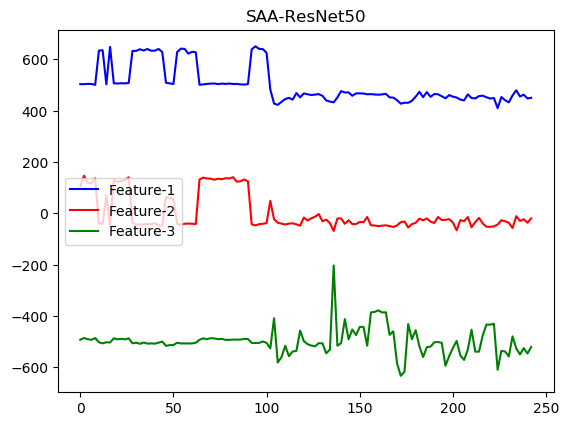

In [173]:
plt.close()
plt.rcParams = plt.rcParamsDefault
plt.plot(times,encodings3D[:,0]+500,'-b', label = 'Feature-1')
plt.plot(times,encodings3D[:,1],'-r', label = 'Feature-2')
plt.plot(times,encodings3D[:,2]-500,'-g', label = 'Feature-3')
plt.title('SAA-ResNet50')
plt.rcParams = [30,30]
plt.legend()
plt.show()

In [133]:
# images = np.array(images)
# print('Shape before PCA: '+str(images.shape))

# data = StandardScaler().fit_transform(images) #Leaving out time for PCA
# pca = PCA(n_components=3)

# encodings3D = pca.fit_transform(data)
# print('Shape after PCA: '+str(encodings3D.shape))

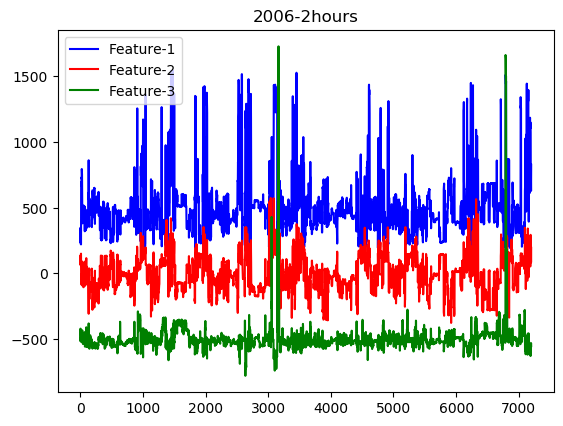

In [134]:
plt.close()
plt.rcParams = plt.rcParamsDefault
plt.plot(times,encodings3D[:,0]+500,'-b', label = 'Feature-1')
plt.plot(times,encodings3D[:,1],'-r', label = 'Feature-2')
plt.plot(times,encodings3D[:,2]-500,'-g', label = 'Feature-3')
plt.title('2006-2hours')
plt.rcParams = [30,30]
plt.legend()
plt.show()

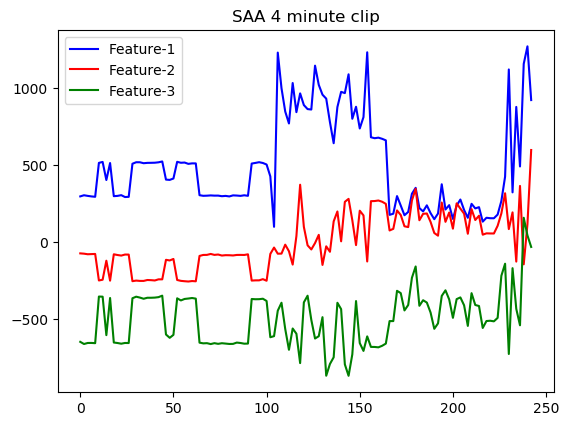

In [116]:
plt.close()
plt.rcParams = plt.rcParamsDefault
plt.plot(times,encodings3D[:,0]+500,'-b', label = 'Feature-1')
plt.plot(times,encodings3D[:,1],'-r', label = 'Feature-2')
plt.plot(times,encodings3D[:,2]-500,'-g', label = 'Feature-3')
plt.title('SAA 4 minute clip')
plt.rcParams = [30,30]
plt.legend()
plt.show()